# **PROCESAMIENTO DEL HABLA - TP 4** 💻

> 🙋🏻‍♂️ **Juan Andres Garcia Alves de Borba** (DNI 30182100)

## Actividades

### 1. Elaborar un dataset de preguntas y respuestas para crear un Chatbot para un aplicación particular. (3 puntos)

- 1.1 Debe definir la aplicación (atención al cliente bancario, atención a estudiantes universitarios, etc).  
- 1.2 El listado de preguntas y respuestas debe tener como mínimo 20 elementos pregunta-respuesta.

### 2. Crear el chatbot utilizando TF-IDF y similitud del coseno. (1 punto)

### 3. Crear otro chatbot utilizando embeddings. (1 punto)

- Indique cuál embedding pre-entrenado eligió.

### 4. Muestra ambos chatbots funcionando (1 punto)

- Adjuntar la lista de preguntas utilizadas para probar el funcionamiento.

### 5. Añade tus conclusiones de todo lo realizado (2 punto)

### 6. BONUS: usa lo realizado en 1 y 3 para crear un chatbot RAG. (2 puntos)

* Utiliza un modelo LLM pre-entrenado.

* Este punto no es obligatorio de realizar para quienes quieran regularizar / recuperar y luego rendirán en mesa.
* Para quienes tienen condiciones para promocionar (han realizado y entregado los TPs a tiempo) la resolución de este ejercicio será tenida en cuenta para sumar a la promoción.

### 7. No olvides:

* Explicar tus decisiones y configuraciones. Añadir tus conclusiones.
* Anunciar en el foro cuál será tu aplicación y postear tu entrega y tus avances.
* Debes subir tu notebook a un repo GitHub público de tu propiedad compartido + enlace colab.
* Documentar todo el proceso.





## ➡️ Chatbots Basados en Recuperación

En inglés information retrieval chatbots.

### ⚙️ Motores de Búsqueda

* Búsqueda por palabras clave: Extrae palabras clave de la pregunta del usuario y busca coincidencias en las preguntas almacenadas.

* Similitud del coseno: Si has representado las preguntas como vectores (por ejemplo, usando TF-IDF o word embeddings), puedes usar la similitud del coseno para medir la distancia entre las preguntas.

* Word embeddings: Utiliza modelos de word embeddings como Word2Vec o BERT para obtener representaciones semánticas de las preguntas y las consultas del usuario.

### ⚙️ Instalaciones

In [ ]:
# !pip install spacy --quiet
# !python -m spacy download es_core_news_sm --quiet

In [ ]:
# import spacy
# nlp = spacy.load("es_core_news_sm")

# import es_core_news_sm
# nlp = es_core_news_sm.load()
# doc = nlp("Esto es una frase.")
# print([(w.text, w.pos_) for w in doc])

### 🔎 Ejemplo: Búsqueda por Palabras Claves

In [ ]:
knowlegde_base = {
  "hola": "¡Hola! ¿En qué puedo ayudarte?",
  "adiós": "Hasta luego. ¡Que tengas un buen día!",
  "información": "¿Qué tipo de información estás buscando?"
}

welcome = "Hola, soy Flufi, el chatbot de ..."
good_bye = "Chatbot: Hasta luego."
exit_cmd = ["salir", "fin", "terminar", "adios"]

In [ ]:
def answer_question(question):
  parsed_question = nlp(question.lower())  # Procesa la pregunta y convierte a minúsculas
  answer = "Lo siento, no entiendo tu pregunta."

  # Busca una coincidencia en el diccionario
  for word in parsed_question:

    # regresa la primer coincidencia que encuentra
    if word.text in knowlegde_base:
      answer = knowlegde_base[word.text]
      break

  return answer

In [ ]:
# print(welcome)
# while True:
#
#   user_input = input("Tú: ")
#   if user_input.lower() in exit_cmd:
#     print(good_bye)
#     break
#
#   answer = answer_question(user_input)
#   print("Chatbot:", answer)

### 🔎 Ejemplo: Búsqueda por Similitud

Para los chatbots basados ​​en recuperación, es común utilizar bolsas de palabras (bag of words) o TF-IDF para calcular la similitud de intenciones.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Datos de ejemplo
questions = ["¿Qué es el aprendizaje automático?", "¿Cómo funciona la regresión lineal?"]
answers = ["El aprendizaje automático es una rama de la inteligencia artificial...", "La regresión lineal es un método de modelado..."]

# Vectorización con TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(questions)

In [ ]:
# Función para encontrar la mejor coincidencia
def answer_question(question):

  question_vec = vectorizer.transform([question])
  similarities = cosine_similarity(question_vec, tfidf_matrix).flatten()
  print(similarities)

  idx_best_match = similarities.argmax()
  print(idx_best_match)

  return answers[idx_best_match]

In [ ]:
# Ejemplo de consulta
# question = "¿Qué es la regresión lineal?"
# print(answer_question(question))

### 🔎 Ejemplo: Búsqueda por Similitud en Embeddings

Puedes vectorizar el texto usando embeddings, como vimos la clase pasada.


# **Tareas: Info Retrieval Chatbot**

> Para este Trabajo Práctico me voy a enfocar en un chatbot sobre el **FIFA Mundial de Clubes 2025**, que inicia este próximo sábado 14/06/2025. ⚽


## 🛠️ Setup & Configuraciones

👉🏻 Instalaciones (Puntos 1-5) ...

In [1]:
! pip install spacy --quiet
! python -m spacy download es_core_news_md --quiet
# ! python -m spacy download es_core_news_sm --quiet    # una opción más ligera

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 20.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


👉🏻 Instalaciones (Puntos 6: RAG) ...

In [2]:
! pip install chromadb sentence-transformers transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 5.9 MB/s eta 0:

In [3]:
! pip install datasets evaluate ragas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.44
    Uninstalling langsmith-0.3.44:
      Successfully uninstalled langsmith-0.3.44
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.63
    Uninstalling langchain-cor

👉🏻 Importar las librerías (Puntos 1-5) ...

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

import spacy
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
# cargar el modelo 'es_core_news_md' (otra opción: 'es_core_news_sm')
nlp = spacy.load("es_core_news_md")

👉🏻 Importar las librerías (Punto 6: RAG) ...

In [47]:
import pandas as pd
from datasets import Dataset

import chromadb
from chromadb.utils import embedding_functions

from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

from ragas import evaluate
from ragas.metrics import context_recall, context_precision, faithfulness, answer_relevancy

👉🏻 Configuraciones generales ...

In [7]:
# mayor ancho en el print() antes que se genere un salto de línea
np.set_printoptions(linewidth=175)      # saltos de línea (otra opción: linewidth=np.inf)
np.set_printoptions(threshold=np.inf)   # ancho para los arrays (otra opción: np.inf)

# evitar la notación científica, valores con 3 decimales
np.set_printoptions(precision=3, suppress=True)

## 📚 Punto 1. Elaborar un dataset de preguntas y respuestas. (3 puntos)

Elaborar un dataset de preguntas y respuestas para crear un Chatbot para una aplicación particular.

👉🏻 Armar el dataset ...

Son 100 preguntas & respuestas... buscando un mejor código, las voy a leer desde un archivo `.csv` que alojé en el repo del TP, en lugar de hardcodearlas en el código fuente. 😄

In [8]:
url = "https://raw.githubusercontent.com/andres-garcia-alves/issd-ph/refs/heads/main/Trabajo%20Practico%2004/mundial_de_clubes_2025.csv"
df = pd.read_csv(url, sep=',')
df.head(3)

,Pregunta,Respuesta
0,Qué es el Mundial de Clubes 2025,El Mundial de Clubes 2025 es un torneo interna...
1,Dónde se jugará el Mundial de Clubes 2025,El Mundial de Clubes 2025 se jugará en Estados...
2,Cuándo empieza el torneo,El torneo está programado para comenzar el 14 ...


In [9]:
questions = []
answers = []

# pasar los datos del dataframe a las listas
for i in range(len(df)):
  questions.append(df["Pregunta"][i].lower())
  answers.append(df["Respuesta"][i])

# agregar la entrada correspondientes al saludo
questions.append("hola")
answers.append("Hola, soy 'Corazón Futbolero ⚽', el chatbot de información sobre el FIFA Mundial de Clubes 2025.")

In [10]:
questions[:5]    # una muestra

['qué es el mundial de clubes 2025',
 'dónde se jugará el mundial de clubes 2025',
 'cuándo empieza el torneo',
 'cuántos equipos participan en el mundial de clubes 2025',
 'cómo se clasifican los equipos para el torneo']

In [11]:
answers[:5]    # una muestra

['El Mundial de Clubes 2025 es un torneo internacional de fútbol organizado por la FIFA que reunirá a 32 equipos de clubes de todo el mundo.',
 'El Mundial de Clubes 2025 se jugará en Estados Unidos, en distintas ciudades sede distribuidas por todo el país.',
 'El torneo está programado para comenzar el 14 de junio y finalizar el 13 de julio de 2025.',
 'En esta edición participarán 32 equipos, representando a todas las confederaciones continentales.',
 'Los equipos se clasifican al Mundial de Clubes 2025 mediante el rendimiento en torneos continentales entre 2021 y 2024.']

👉🏻 Funciones auxiliares para preprocesar los inputs de usuario ...

In [12]:
# descargar las stopwords y armar un conjunto set() ordenado, con las stopwords del idioma español
nltk.download('stopwords')
stopwords_es = sorted(set(stopwords.words('spanish')))

def remove_stopwords(text):
  splited_text = text.split()
  return ' '.join(w for w in splited_text if w not in stopwords_es)

questions = [remove_stopwords(question) for question in questions]
questions[:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['mundial clubes 2025',
 'dónde jugará mundial clubes 2025',
 'cuándo empieza torneo',
 'cuántos equipos participan mundial clubes 2025',
 'cómo clasifican equipos torneo']

In [13]:
def preprocessing(text):

  text = text.lower()                               # pasar a a minúsculas
  text = re.sub(r'[.¡!¿?\'\"“”‘’«»…]', '', text)    # eliminar signos de puntuación y otros símbolos
  text = re.sub(r'\s+', ' ', text).strip()          # reemplazar múltiples espacios por uno solo
  text = re.sub(r'\.\.\.', '', text)                # eliminar puntos suspensivos
  text = re.sub(r'[^a-zñ\s]', '', text)             # eliminar cualquier caracter que no sea letra sin tilde o espacio
  # text = remove_stopwords(text)                   # eliminar stopwords

  return text

👉🏻 Funciones auxiliares para lematizar una pregunta / lista de preguntas ...

In [14]:
def lemmatice_question(question):

  question_nlp = nlp(question)

  question_lemmatized = " ".join([token.lemma_ for token in question_nlp])
  return question_lemmatized

In [15]:
def lemmatice_questions(questions):

  questions_nlp = [nlp(question) for question in questions]

  questions_lemmatized = []
  for question_nlp in questions_nlp:
    question_string = " ".join([token.lemma_ for token in question_nlp])
    questions_lemmatized.append(question_string)

  return questions_lemmatized

👉🏻 Lematizar las preguntas ...

In [16]:
questions_lemmatized = lemmatice_questions(questions)
questions_lemmatized[:10]    # una muestra

['mundial club 2025',
 'dónde jugar mundial club 2025',
 'cuándo empezar torneo',
 'cuántos equipo participar mundial club 2025',
 'cómo clasificar equipo torneo',
 'cuántos equipo representar cada continente',
 'club clasificado',
 'club argentino torneo',
 'club brasileño',
 'participar alguno club mls']

 👉🏻 Observaciones ...

> 👁️‍🗨️ Para facilitar la elaboración del listado de preguntas & respuestas, le dí algo de contexto a ChatGPT, y le pedí que me genere un listado base de preguntas frecuentes.

> 👁️‍🗨️ Luego contrasté los resultados contra una docena de sitios (FIFA, periódicos, portales deportivos), tras lo cual tuve que hacerle varios ajustes. El detalle en la sección `Referencias`.

> 👁️‍🗨️ De paso, incremento rápidamente de 20 a 100 las preguntas y respuestas. 💪🏻

> ✏️ Prompt: https://chatgpt.com/share/684a8c07-3948-8001-8da9-f02ba54415a1

## 💬 Punto 2. Crear el chatbot utilizando TF-IDF y similitud del coseno. (1 punto)

👉🏻 Vectorización con TF-IDF ...

In [17]:
# crear la matriz tf-idf para todas las preguntas
tf_idf_vectorizer = TfidfVectorizer()

questions_vec = tf_idf_vectorizer.fit_transform(questions)
questions_lemmatized_vec = tf_idf_vectorizer.transform(questions_lemmatized)

👉🏻 Función auxiliar para computar matrices TF-IDF ...

In [18]:
def compute_tf_idf(text):
  return tf_idf_vectorizer.transform([text])

👉🏻 Función para encontrar la mejor coincidencia ...

In [19]:
def answer_question_v1(question_vec, questions_vec):

  # similitud del coseno
  similarities = cosine_similarity(question_vec, questions_vec).flatten()
  # print(similarities)

  # mejor coincidencia
  best_match_idx = similarities.argmax()
  best_match_sim = similarities.max()
  # print(best_match_idx, best_match_sim)

  return answers[best_match_idx], best_match_idx, best_match_sim

👉🏻 Ejemplo de consulta ...

In [20]:
question = "¿Qué es el mundial de clubes?"

# preprocesamiento
question = preprocessing(question)

# calcular la matriz tf-idf de la pregunta
question_vec = compute_tf_idf(question)

# buscar la mejor respuesta
answer_text, answer_idx, answer_sim = answer_question_v1(question_vec, questions_vec)

print(f"Answer similarity:  {answer_sim:2f}")
print(f"Answer index:       {answer_idx}")
print(f"Answer text:        {answer_text}")

Answer similarity:  0.763475
Answer index:       0
Answer text:        El Mundial de Clubes 2025 es un torneo internacional de fútbol organizado por la FIFA que reunirá a 32 equipos de clubes de todo el mundo.


## 💬 Punto 3. Crear otro chatbot utilizando Embeddings. (1 punto)

Indique cuál embedding pre-entrenado eligió.

👉🏻 Funciones auxiliares para computar embeddings ...

In [21]:
def compute_embedding(text):
  return nlp(text).vector

def compute_embeddings(texts):
  return [nlp(text).vector for text in texts]

👉🏻 Embedding pre-entrenado ...

Voy a estar utilizando modelo `es_core_news_md` de `spaCy` dada su facilidad de uso y velocidad de cómputo.

In [22]:
# crear los embeddings para todas las preguntas
questions_nlp = compute_embeddings(questions)
questions_lemmatized_nlp = compute_embeddings(questions_lemmatized)

# questions_nlp[0]              # una muestra
# questions_lemmatized_nlp[0]   # una muestra

👉🏻 Función para encontrar la mejor coincidencia ...

In [23]:
def answer_question_v2(question_nlp, questions_nlp):

  # similitud del coseno
  similarities = cosine_similarity([question_nlp], questions_nlp).flatten()
  # print(similarities)

  # mejor coincidencia
  best_match_idx = similarities.argmax()
  best_match_sim = similarities.max()
  # print(best_match_idx, best_match_sim)

  return answers[best_match_idx], best_match_idx, best_match_sim

👉🏻 Ejemplo de consulta ...

In [24]:
question = "¿Qué es el mundial de clubes?"

# preprocesamiento
question = preprocessing(question)

# calcular el embedding de la pregunta
question_nlp = compute_embedding(question)

# buscar la mejor respuesta
answer_text, answer_idx, answer_sim = answer_question_v2(question_nlp, questions_nlp)

print(f"  Answer similarity:  {answer_sim:.2f}")
print(f"  Answer index:       {answer_idx}")
print(f"  Answer text:        {answer_text}")

  Answer similarity:  0.41
  Answer index:       5
  Answer text:        La distribución incluye: UEFA (12), CONMEBOL (6), AFC (4), CAF (4), CONCACAF (4), OFC (1) y 1 cupo para el anfitrión.


## 📌 Punto 4. Muestra ambos chatbots funcionando. (1 punto)

Adjuntar la lista de preguntas utilizadas para probar el funcionamiento.

👉🏻 Variables para los textos de saludo final, pregunta desconocida, y la respuesta al comando 'salir' ...

In [25]:
good_bye = "Hasta luego. ¡Que tengas un buen día!"
unknown = "Lo siento, no entiendo tu pregunta."

# mejora (al bot de ejemplo):
# con este array es más flexible para los usuarios el comando 'salir'
exit_cmd = ["salir", "fin", "terminar", "bye", "adios", "adiós"]

👉🏻 El chatbot **'Corazón Futbolero v1'** ⚽ (basado en `TF-IDF`) en acción ...

In [26]:
def run_chatbot_v1():
  print("Usa finalizar puedes escribir:", exit_cmd, "\n")

  while True:
    question = input("💬 Tú:  ")

    # preprocesamiento
    question = preprocessing(question)

    # chequear si el input es el comando 'salir'
    if question in exit_cmd:
      print("💬 Bot:", good_bye)
      break

    # calcular el embedding de la pregunta
    question_vec = compute_tf_idf(question)

    # buscar la mejor respuesta (tf-idf)
    answer_text, answer_idx, answer_sim = answer_question_v1(question_vec, questions_vec)

    # mostrar la respuesta solo si la similitud fue de al menos un 25%
    if answer_sim > 0.25: print("💬 Bot:", answer_text, "\n")
    else:                 print("💬 Bot:", unknown, "\n")

In [27]:
# run_chatbot_v1()

👉🏻 El chatbot **'Corazón Futbolero v2'** ⚽ (basado en `Embeddings`) en acción ...

In [28]:
def run_chatbot_v2():
  print("Usa finalizar puedes escribir:", exit_cmd, "\n")

  while True:
    question = input("💬 Tú:  ")

    # preprocesamiento
    question = preprocessing(question)

    # chequear si el input es el comando 'salir'
    if question in exit_cmd:
      print("💬 Bot:", good_bye)
      break

    # calcular el embedding de la pregunta
    question_nlp = compute_embedding(question)

    # buscar la mejor respuesta (embeddings)
    answer_text, answer_idx, answer_sim = answer_question_v2(question_nlp, questions_nlp)

    # mostrar la respuesta solo si la similitud fue de al menos un 25%
    if answer_sim > 0.25: print("💬 Bot:", answer_text, "\n")
    else:                 print("💬 Bot:", unknown, "\n")

In [29]:
# run_chatbot_v2()

👉🏻 Lista de preguntas utilizadas para probar el funcionamiento (20 preguntas) ...

In [30]:
# formato: input del usuario + idx de la respuesta correcta
test_questions = [
  ("Hola", 100),
  ("¿Qué es?", 0),
  ("Que es el Mundial de Clubes", 0),
  ("Donde se juega", 1),
  ("Cuándo empieza", 2),
  ("Cuantos equipos participan", 3),
  ("Estadios", 18),
  ("Donde comprar las estradas", 22),
  ("premios para el campeón", 38),
  ("streaming", 53),
  ("El balón oficial", 72),
  ("Cómo se eligen los árbitros?", 34),
  ("clubes argentinos", 7),
  ("clubes brasileños", 8),
  ("¿Qué sucede si hay empate en puntos?", 13),
  ("Qué sucede si hay empate en octavos", 60),
  ("¿Cuantos cambios por partido?", 64),
  ("VAR", 35),
  ("ver partidos desde Argentina", 31),
  ("¿Habrá tiempo adicional?", 66)
]

test_size = len(test_questions)

👉🏻 Comparando resultados ...

In [31]:
def check_results(correct_idx, answer_idx):
  result = 1 if answer_idx == correct_idx else 0
  return result

def show_results(title, correct_idx, answer_idx, answer_text):
  status = "OK " if answer_idx == correct_idx else "MAL"
  print(f"  { title } - Status: { status } (IDX { answer_idx }), TEXT: { answer_text }")

In [32]:
tf_idf_base_count = 0
tf_idf_lemma_count = 0
embeddings_base_count = 0
embeddings_lemma_count = 0

for question, correct_idx in test_questions:
  print(f"* Pregunta: '{ question }' (IDX correcto { correct_idx })")

  # preprocesamiento
  question = preprocessing(question)

  # lematizar
  question_lemmatized = lemmatice_question(question)

  # calcular ambas matrices tf-idf de la pregunta
  question_vec = compute_tf_idf(question)
  question_lemmatized_vec = compute_tf_idf(question_lemmatized)

  # calcular ambos embeddings de la pregunta
  question_nlp = compute_embedding(question)
  question_lemmatized_nlp = compute_embedding(question_lemmatized)

  # pregunta al chatbot basado en tf-idf (base)
  answer_text, answer_idx, answer_sim = answer_question_v1(question_vec, questions_vec)
  tf_idf_base_count += check_results(correct_idx, answer_idx)
  show_results("TF-IDF (base)   ", correct_idx, answer_idx, answer_text)

  # pregunta al chatbot basado en tf-idf+lematizacion
  answer_text, answer_idx, answer_sim = answer_question_v1(question_lemmatized_vec, questions_lemmatized_vec)
  tf_idf_lemma_count += check_results(correct_idx, answer_idx)
  show_results("TF-IDF+Lemma    ", correct_idx, answer_idx, answer_text)

  # pregunta al chatbot basado en embeddings (base)
  answer_text, answer_idx, answer_sim = answer_question_v2(question_nlp, questions_nlp)
  embeddings_base_count += check_results(correct_idx, answer_idx)
  show_results("Embedding (base)", correct_idx, answer_idx, answer_text)

  # pregunta al chatbot basado en embeddings+lematizacion
  answer_text, answer_idx, answer_sim = answer_question_v2(question_lemmatized_nlp, questions_lemmatized_nlp)
  embeddings_lemma_count += check_results(correct_idx, answer_idx)
  show_results("Embedding+Lemma ", correct_idx, answer_idx, answer_text)

  print()

* Pregunta: 'Hola' (IDX correcto 100)
  TF-IDF (base)    - Status: OK  (IDX 100), TEXT: Hola, soy 'Corazón Futbolero ⚽', el chatbot de información sobre el FIFA Mundial de Clubes 2025.
  TF-IDF+Lemma     - Status: OK  (IDX 100), TEXT: Hola, soy 'Corazón Futbolero ⚽', el chatbot de información sobre el FIFA Mundial de Clubes 2025.
  Embedding (base) - Status: OK  (IDX 100), TEXT: Hola, soy 'Corazón Futbolero ⚽', el chatbot de información sobre el FIFA Mundial de Clubes 2025.
  Embedding+Lemma  - Status: OK  (IDX 100), TEXT: Hola, soy 'Corazón Futbolero ⚽', el chatbot de información sobre el FIFA Mundial de Clubes 2025.

* Pregunta: '¿Qué es?' (IDX correcto 0)
  TF-IDF (base)    - Status: OK  (IDX 0), TEXT: El Mundial de Clubes 2025 es un torneo internacional de fútbol organizado por la FIFA que reunirá a 32 equipos de clubes de todo el mundo.
  TF-IDF+Lemma     - Status: OK  (IDX 0), TEXT: El Mundial de Clubes 2025 es un torneo internacional de fútbol organizado por la FIFA que reunirá 

👉🏻 Totalizar Resultados ...

In [33]:
tf_idf_base_percent       = int(tf_idf_base_count / test_size * 100)
tf_idf_lemma_percent      = int(tf_idf_lemma_count / test_size * 100)
embeddings_base_percent   = int(embeddings_base_count / test_size * 100)
embeddings_lemma_percent  = int(embeddings_lemma_count / test_size * 100)

print(f"Chatbot TF-IDF de base:           { tf_idf_base_count }/{ test_size } ({ tf_idf_base_percent }%) aciertos.")
print(f"Chatbot TF-IDF+Lematizacion:      { tf_idf_lemma_count }/{ test_size } ({ tf_idf_lemma_percent }%) aciertos.")
print(f"Chatbot Embeddings de base:       { embeddings_base_count }/{ test_size } ({ embeddings_base_percent }%) aciertos.")
print(f"Chatbot Embeddings+Lematizacion:  { embeddings_lemma_count }/{ test_size } ({ embeddings_lemma_percent }%) aciertos.")

Chatbot TF-IDF de base:           15/20 (75%) aciertos.
Chatbot TF-IDF+Lematizacion:      9/20 (45%) aciertos.
Chatbot Embeddings de base:       9/20 (45%) aciertos.
Chatbot Embeddings+Lematizacion:  7/20 (35%) aciertos.


👉🏻 Observaciones ...

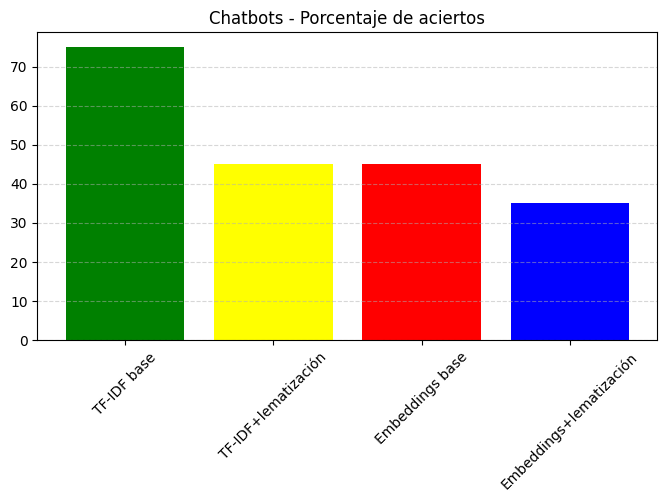

In [34]:
chatbots  = ["TF-IDF base", "TF-IDF+lematización", "Embeddings base", "Embeddings+lematización"]
data      = [tf_idf_base_percent, tf_idf_lemma_percent, embeddings_base_percent, embeddings_lemma_percent]
colors    = ["Green", "Yellow", "Red", "Blue"]

fig = plt.figure(figsize=(8, 4))
plt.title("Chatbots - Porcentaje de aciertos")
plt.bar(chatbots, data, color=colors)
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.show()

👁️‍🗨️ El chatbot basado en TF-IDF alcanzó un 80% de aciertos para el set de preguntas elegido.

👁️‍🗨️ Por el otro lado, el chatbot basado en Embeddings alcanzó un magro 30% de aciertos para el mismo set de preguntas.

## 💡 Punto 5. Añade tus conclusiones de todo lo realizado (2 punto)

👁️‍🗨️ Considerando que **originalmente**:
- No se aplicó eliminación de `stop-words`, ni del input del usuario, ni al momento de armar los `TF-IDF`/`embeddings` para ambos chatbots
- No se utilizaron técnicas de `steaming`/`lematización`, ni sobre el input del usuario, ni sobre las preguntas disponibles para ambos chatbots
- (aunque se incluye un preprocesamiento básico al input de usuario) ...

👁️‍🗨️ Que el chatbot basado en `TF-IDF`, utilizando solamente la `similitud del coseno`, esté logrando un `80% de aciertos` me parece sorprendente, y una muy buena base para una mejora posterior. 👍🏻

👁️‍🗨️ Por otro, lado en comparación, me llama la atención lo mal que se ha desempeñado el segundo chatbot, basado en los modelos de `spaCy`. Originalmente estaba con el `es_core_news_sm`, el cual luego cambié a `es_core_news_md`, para probar si mejoraba el desempeño.  
Para ambos casos obtuve el mismo resultado: 6/20 (30%) aciertos.

👁️‍🗨️ Cuando posteriormente agregué `lematización`, el chatbot basado en `embedding` mejoró marginalmente.  
Por otro lado el chatbot basado en `TF-IDF` (que venía bastante bien) redujo su tasa de aciertos a la mitad. 🙃

## 💎 Punto 6. (BONUS) Usa lo realizado en 1 y 3 para crear un chatbot RAG. (2 puntos)

👉🏻 Formatear los datos ...

In [35]:
# unir las preguntas y respuestas para su indexacion posterior
df["Contenido"] = df["Pregunta"] + " " + df["Respuesta"]
df.head(3)

,Pregunta,Respuesta,Contenido
0,Qué es el Mundial de Clubes 2025,El Mundial de Clubes 2025 es un torneo interna...,Qué es el Mundial de Clubes 2025 El Mundial de...
1,Dónde se jugará el Mundial de Clubes 2025,El Mundial de Clubes 2025 se jugará en Estados...,Dónde se jugará el Mundial de Clubes 2025 El M...
2,Cuándo empieza el torneo,El torneo está programado para comenzar el 14 ...,Cuándo empieza el torneo El torneo está progra...


👉🏻 Inicializar ChromaDB + Embedding model ...

In [36]:
embedding_model = "all-MiniLM-L6-v2"

# crear una instancia de la DB vectorial
chroma_client = chromadb.Client()

# crear una función de embeddings basada en SentenceTransformer
# es la que utiliza luego ChromaDB para convertir el texto en vectores numéricos
sentence_transformer_ef = embedding_functions.SentenceTransformerEmbeddingFunction(model_name=embedding_model)

# crear la colección de vectores en ChromaDB (asociada al modelo de embeddings)
db_collection = chroma_client.create_collection(name="faq_rag", embedding_function=sentence_transformer_ef, get_or_create=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

👉🏻 Indexar documentos ...

In [37]:
# agregar los documentos a la colección
db_collection.add(
  ids=[str(i) for i in range(len(df))],     # id
  documents=df["Contenido"].tolist(),       # contenido del documento
  metadatas=[{"pregunta": q, "respuesta": r} for q, r in zip(df["Pregunta"], df["Respuesta"])] # permite filtrar por campos individuales
)

👉🏻 Modelo generador ...

In [38]:
generative_model = "google/flan-t5-base"   # otra opciones: "google/flan-t5-base", "google/flan-t5-small"

# el tokenizer convierte el texto en IDs numericos para que puedan procesarse en el modelo
tokenizer = AutoTokenizer.from_pretrained(generative_model)

# modelo Seq2Seq (texto a texto) para generar las respuestas en lenguaje natural
# a partir de un prompt que combina el contexto recuperado + la pregunta del usuario.
generator = AutoModelForSeq2SeqLM.from_pretrained(generative_model)

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

👉🏻 Función de respuesta ...

In [39]:
def answer_question_v3(question, top_k=3):

  # buscar en ChromaDB los documentos más relevantes
  results = db_collection.query(query_texts=[question], n_results=top_k)
  documents = results["documents"][0]
  context = "\n".join(documents)

  # crear el prompt con el contexto + la pregunta del usuario
  prompt = f"Contexto:\n{ context }\n\nPregunta: { question }\nRespuesta:"

  # tokenizar el prompt
  input_ids = tokenizer(prompt, return_tensors="pt", truncation=True).input_ids

  # generar la respuesta, 200 nuevos tokens como máximo (adicionales a los del prompt original)
  output_ids = generator.generate(input_ids, max_new_tokens=200)
  response = tokenizer.decode(output_ids[0], skip_special_tokens=True)

  return response

> 👁️‍🗨️ Cuando se le pasa el `prompt`, el modelo no tiene una comprensión explícita de "qué es contexto" y "qué es pregunta".

> 👁️‍🗨️ Pero sí puede aprender a diferenciarlo al indicárselo claramente.  
De ahí que el `prompt` se arme como: `'Contexto:\n{context}\n\nPregunta: {question}\nRespuesta:'`.

> 👁️‍🗨️ Buscando sobre este tema... este tipo de prompts se consideran estructurados de **forma instructiva**, lo que resulta útil para modelos como `Flan-T5-*`, que fueron ajustados para este tipo de instrucciones. El modelo "entiende" que debe completar la parte después de `'Respuesta:'`.

> 👁️‍🗨️ De ahí el nombre de esta famila de modelos: `Fine-tuned LAnguage Net (FLAN)`, que están afinados con un enfoque instructivo.

👉🏻 El chatbot **'Corazón Futbolero v3'** ⚽ (basado en `TF-IDF`) en acción ...

In [40]:
def run_chatbot_v3():
  print("Usa finalizar puedes escribir:", exit_cmd, "\n")

  while True:
    question = input("💬 Tú:  ")

    # preprocesamiento
    question = preprocessing(question)

    # chequear si el input es el comando 'salir'
    if question in exit_cmd:
      print("💬 Bot:", good_bye)
      break

    answer_text = answer_question_v3(question)
    print("💬 Bot:", answer_text, "\n")

In [ ]:
# run_chatbot_v3()

## 💎 Punto 7. (PROPIO): Evaluando el rendimiento

👉🏻 Funciones auxiliares (aplican la misma lógica que en partes del Punto 6) ...

In [41]:
def build_context(question, n_results=3):
  # buscar en ChromaDB los documentos más relevantes
  results = db_collection.query(query_texts=[question], n_results=n_results)
  documents = results["documents"][0]
  return documents

def build_answer(question, contexto):
  # crear el prompt con el contexto + la pregunta del usuario
  prompt = f"Contexto:\n{ contexto }\n\nPregunta: { question }\nRespuesta:"

  # tokenizar el prompt
  input_ids = tokenizer(prompt, return_tensors="pt").input_ids
  output_ids = generator.generate(input_ids, max_new_tokens=200)
  response = tokenizer.decode(output_ids[0], skip_special_tokens=True).strip()
  return response

In [42]:
df.head(3)

,Pregunta,Respuesta,Contenido
0,Qué es el Mundial de Clubes 2025,El Mundial de Clubes 2025 es un torneo interna...,Qué es el Mundial de Clubes 2025 El Mundial de...
1,Dónde se jugará el Mundial de Clubes 2025,El Mundial de Clubes 2025 se jugará en Estados...,Dónde se jugará el Mundial de Clubes 2025 El M...
2,Cuándo empieza el torneo,El torneo está programado para comenzar el 14 ...,Cuándo empieza el torneo El torneo está progra...


👉🏻 Evaluando el rendimiento (métricas) ...

In [43]:
contexts = []
responses = []

df_aux = df.head(10)  # si se quiere acelerar, que esta parte demora una banda ...
# df_aux = df         # para evaluar sobre todas las preguntas

for question in df_aux["Pregunta"]:
  docs = build_context(question)
  contexts.append(docs)
  respuesta = build_answer(question, "\n".join(docs))
  responses.append(respuesta)

data_dict = {
  "question": df_aux["Pregunta"].tolist(),
  "contexts": contexts,
  "response": responses,
  "ground_truth": df_aux["Respuesta"].tolist()
}

ds_ragas = Dataset.from_dict(data_dict)

👉🏻 Las nuevas versiones de `Ragas` usan modelos de `OpenAI` ...

> La versión actual de `Ragas` (`v0.2.15`) por detrás usa modelos (pagos) de `OpenAI`.  
Tras investigar un poco encontré que hasta la `v0.1.15` funcionaba sin `OpenAI`.

> Probé forzando la versión con `!pip install ragas==0.1.15`, pero solo me llevó a horas de prueba y error por errores en dependencias cruzadas con las otras librerías en uso.  
La versión vieja fuerza versiones antiguas en otros paquetes, y luego esas versiones antiguas generan errores en `NLTK`, `spaCy`, y otros.

> Hasta probé de llevarme el código de este `Punto 7` y sus librerías indispensables a un notebook aparte (con la idea de transportar luego los datos con un `.csv` de por medio), pero aún así la versión vieja generó otros errores con los paquetes `sentence_transformers` y `chromadb`, que son indispensables para esta consigna.

> Ni de broma dejo mi API Key expuesta en un GitHub público o video de YT...  
Si se quiere re-ejecutar la última celda del notebook donde se evalúan las métricas, de debe completar la siguiente celda con una API Key válida. 🤭

In [45]:
import os
os.environ["OPENAI_API_KEY"] = "api-key"

In [48]:
# las otras 2 métricas 'faithfulness' y 'answer_relevancy' requieren API Key de OpenAI
results = evaluate(dataset=ds_ragas, metrics=[context_recall, context_precision, faithfulness, answer_relevancy])
print(results)

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

{'context_recall': 1.0000, 'context_precision': 0.9667, 'faithfulness': 0.9833, 'answer_relevancy': 0.7932}


> 👁️‍🗨️ De la etapa `Retrieval` (del contexto):
  - `Context Recall`: Mide que tan bien el contexto recuperado cubre la respuesta esperada.
  - `Context Precision`: Mide que proporción del contexto recuperado es útil para responder la pregunta. Penaliza el contexto irrelevante (ruido).

> 👁️‍🗨️ De la etapa `Reader` (del generador):
  - `Faithfulness`: Mide que tanto la respuesta generada se basa en el contexto recuperado. Util para detectar 'alucinaciones'.
  - `Answer Relevance`: Evalúa si realmente responde a lo que se preguntó.

> 👁️‍🗨️ Las métricas `faithfulness` y `answer_relevancy` requieren una API Key de OpenAI.

> 👁️‍🗨️ Bastante bien los resultados:  
  - `context_recall: 1.00`  
  - `context_precision: 0.97`  
  - `faithfulness: 0.98`  
  - `answer_relevancy: 0.79`


## ❗ &nbsp;Punto 7. No olvides ...

* Explicar tus decisiones y configuraciones. Añadir tus conclusiones.

* Anunciar en el foro cuál será tu aplicación y postear tu entrega y tus avances.

* Debes subir tu notebook a un repo GitHub público de tu propiedad compartido + enlace colab.

* Documentar todo el proceso.

## 📚 Referencias

- Workflow para RAG  
https://chatgpt.com/share/684d305c-b52c-8001-a25d-7d597a816bbf

- Comparativa entre modelos generativos (elección de `google/flan-t5-small`)  
https://chatgpt.com/share/684d3dea-6b84-8001-8834-1d5d900f7174


<hr>

- Mundial de Clubes 2025 - Canción oficial  
https://www.fifa.com/es/tournaments/mens/club-world-cup/usa-2025/articles/emblema-cancion-oficial-revelados-mundial-de-clubes-fifa-2025

- Mundial de Clubes 2025 - Ciudades y Estadios  
https://cnnespanol.cnn.com/2025/06/12/deportes/mundial-clubes-2025-ciudades-estadios-orix  
https://www.olympics.com/es/noticias/mundial-clubes-2025-sedes-fifa-torneo

- Mundial de Clubes 2025 - Confederaciones y Clubes clasificados  
https://www.espn.com.ar/futbol/mundial-clubes/nota/_/id/13303133/todos-los-clasificados-al-super-mundial-de-clubes-2025-de-la-fifa

- Mundial de Clubes 2025 - Cronograma  
https://digitalhub.fifa.com/m/83583980e0bb1fb/original/FCWC25-Match-Schedule.pdf

- Mundial de Clubes 2025 - Entradas  
https://www.fifa.com/es/tournaments/mens/club-world-cup/usa-2025/tickets

- Mundial de Clubes 2025 - Lugar y fecha de la final  
https://www.beinsports.com/es-us/football/fifa-club-world-cup/articles-video/-cu%C3%A1ndo-y-d%C3%B3nde-se-juega-la-final-del-mundial-de-clubes-2025-2025-06-11

- Mundial de Clubes 2025 - Premios económicos  
https://www.fifa.com/es/tournaments/mens/club-world-cup/usa-2025/articles/modelo-reparto-economico  
https://bolavip.com/mundial-de-clubes/la-fifa-pagara-mas-de-100-millones-de-dolares-al-equipo-que-gane-el-mundial-de-clubes

- Mundial de Clubes 2025 - Referees  
https://inside.fifa.com/es/refereeing/news/designados-arbitros-historico-mundial-de-clubes-fifa-2025

- Mundial de Clubes 2025 - Transmisiones  
https://www.ole.com.ar/futbol-internacional/mundial-de-clubes/ver-mundial-clubes-horario-canales-plataformas-partidos-river-boca_0_jwEaX8LUsU.html
